In [25]:
# Import libraries needed for preprocessing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import ipympl
import seaborn as sns

# Import libraries needed for Clustering  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
# Read the data on which analysis needs to be done and display first 5 entries
data='Online Retail.xlsx'
df_retail=pd.read_excel(data)
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
# Displays datatype, number of non null values and general properties of fields
df_retail.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [28]:
# Checks the number of duplicates
print("The number of duplicate entries : {}".format(df_retail.duplicated().sum())) 

The number of duplicate entries : 5268


In [29]:
# Removes all duplicates keeping the first instance
df_retail.drop_duplicates(keep='first',inplace=True) 
df_retail.duplicated().sum()

0

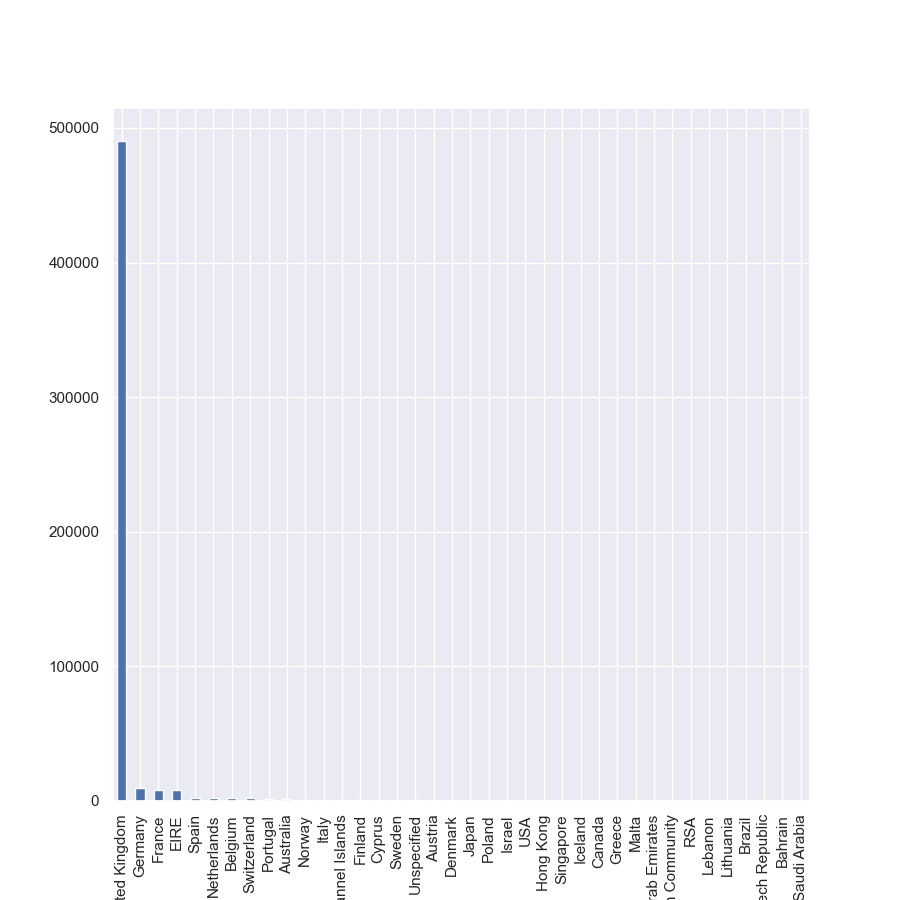

In [30]:
fig, ax = plt.subplots(figsize = (9, 9))
country_counts = df_retail['Country'].value_counts()
ax= country_counts.plot(kind='bar')
plt.show()


In [31]:
# Keeps only entries from the United Kingdom
df_retail=df_retail[df_retail['Country']=='United Kingdom'] 
df_retail['Country'].value_counts()

United Kingdom    490300
Name: Country, dtype: int64

In [32]:
# removes all cancelled orders
df_retail = df_retail[~df_retail["InvoiceNo"].str.contains("C", na=False)] 
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482479 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    482479 non-null  object        
 1   StockCode    482479 non-null  object        
 2   Description  481025 non-null  object        
 3   Quantity     482479 non-null  int64         
 4   InvoiceDate  482479 non-null  datetime64[ns]
 5   UnitPrice    482479 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      482479 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [34]:
# Number of null entries in customer ID
print("The number of null entries for CustomerID is : {}".format(df_retail['CustomerID'].isna().sum()))

The number of null entries for CustomerID is : 133252


In [35]:
# Drop rows with null entries in CustomerID
df_retail=df_retail.dropna(subset=['CustomerID'])
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.0+ MB


In [36]:
# Keep only non negative values of Price and Quantity
df_retail = df_retail[(df_retail['UnitPrice']>0) & (df_retail['Quantity']>0)]
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  object        
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  float64       
 7   Country      349203 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.0+ MB


In [37]:
# Calculates amount as product of unit price and Quantity
df_retail['Amount']=df_retail['Quantity']*df_retail['UnitPrice']
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [38]:
# Calculates total monetary value of each customers as sum of Amount of all transactions and stores in new dataframe
monetary=df_retail.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


In [39]:
# Total number of individual transaction of customers by invoice number
frequency = df_retail.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4412
3,12749.0,199
4,12820.0,59


In [40]:
# Number of days between each transaction and last recorded transaction 
df_retail['Latest'] = max(df_retail['InvoiceDate']) - df_retail['InvoiceDate']
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Latest
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:23:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:23:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:23:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:23:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:23:00


In [41]:
# Most recent transaction per customer 
recency = df_retail.groupby('CustomerID')['Latest'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,Latest
0,12346.0,325 days 02:48:00
1,12747.0,1 days 22:15:00
2,12748.0,0 days 00:29:00
3,12749.0,3 days 02:53:00
4,12820.0,2 days 21:37:00


In [42]:
# Remove time from the values
recency['Latest']=recency['Latest'].dt.days
recency.head()

,CustomerID,Latest
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2


In [43]:
# Merge monetary and frequency tables based on CustomerID
rfm = pd.merge(monetary, frequency, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,77183.60,1
1,12747.0,4196.01,103
2,12748.0,33053.19,4412
3,12749.0,4090.88,199
4,12820.0,942.34,59


In [44]:
# Merge monetary and frequency table with recency table based on CustomerID and change column name
rfm = pd.merge(rfm, recency, on='CustomerID', how='inner')
rfm.columns=['CustomerID','Monetary','Frequency','Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12747.0,4196.01,103,1
2,12748.0,33053.19,4412,0
3,12749.0,4090.88,199,3
4,12820.0,942.34,59,2


In [45]:
# CustomerID is stored as string
rfm['CustomerID']=rfm['CustomerID'].astype(str)

In [46]:
# Statistical description of dataframe
rfm.describe()

,Monetary,Frequency,Recency
count,3920.000000,3920.000000,3920.000000
mean,1858.424654,89.082398,91.208418
std,7478.631256,214.034542,99.533854
min,3.750000,1.000000,0.000000
25%,298.185000,17.000000,17.000000
50%,644.975000,40.000000,50.000000
75%,1571.285000,98.000000,142.000000
max,259657.300000,7676.000000,373.000000


In [47]:
# Set upper limit and lower limit at 3 standard deviations from the mean
m_mean=rfm['Monetary'].mean()
m_sd=rfm['Monetary'].std()
upperl_m=m_mean+3*m_sd
lowerl_m=m_mean-3*m_sd
upperl_m,lowerl_m,m_mean,m_sd

(24294.31842285217, -20577.46911468891, 1858.4246540816325, 7478.631256256846)

In [48]:
# Remove outliers
rfm=rfm[(rfm['Monetary']>lowerl_m) & (rfm['Monetary']<upperl_m)] 
rfm.describe()

,Monetary,Frequency,Recency
count,3887.000000,3887.000000,3887.000000
mean,1352.646929,81.866478,91.746077
std,2083.818453,128.558731,99.563190
min,3.750000,1.000000,0.000000
25%,295.465000,16.000000,17.000000
50%,638.050000,40.000000,50.000000
75%,1533.230000,97.000000,143.000000
max,21086.300000,2677.000000,373.000000


In [49]:
# Repeat for frequency
f_mean=rfm['Frequency'].mean()
f_sd=rfm['Frequency'].std()
upperl_f=f_mean+3*f_sd
lowerl_f=f_mean-3*f_sd
upperl_f,lowerl_f,f_mean,f_sd

(467.54267109615193,
 -303.80971508894845,
 81.86647800360176,
 128.55873103085005)

In [50]:
rfm=rfm[(rfm['Frequency']>lowerl_f) & (rfm['Frequency']<upperl_f)] 
rfm.describe()

,Monetary,Frequency,Recency
count,3816.000000,3816.000000,3816.000000
mean,1252.649113,69.819969,93.250262
std,1875.664680,82.122428,99.832045
min,3.750000,1.000000,0.000000
25%,290.390000,16.000000,18.000000
50%,622.130000,39.000000,51.000000
75%,1445.280000,91.000000,147.000000
max,21086.300000,467.000000,373.000000


In [51]:
# Repeat for Recency
r_mean=rfm['Recency'].mean()
r_sd=rfm['Recency'].std()
upperl_r=r_mean+3*r_sd
lowerl_r=r_mean-3*r_sd
upperl_r,lowerl_r,r_mean,r_sd

(392.7463972429747, -206.24587313396, 93.25026205450733, 99.83204506282244)

In [ ]:
rfm.info()
rfm.head()

In [52]:
# Rescaling the attributes
rfm_reshaped = rfm[['Monetary', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_reshaped)
rfm_df_scaled.shape

(3816, 3)

In [53]:
# Make dataframe and name colums
rfm_scaled = pd.DataFrame(rfm_df_scaled)
rfm_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_scaled.head()

,Monetary,Frequency,Recency
0,1.569442,0.404084,-0.924176
1,1.513385,1.573224,-0.904139
2,-0.165461,-0.131771,-0.914158
3,-0.618491,-0.777234,1.199669
4,-0.161974,-0.290092,-0.232924


In [54]:
# Calculate SSE to find optimum number of clusters
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k,init='k-means++')
    km.fit(rfm_scaled[['Monetary', 'Frequency', 'Recency']])
    sse.append(km.inertia_)

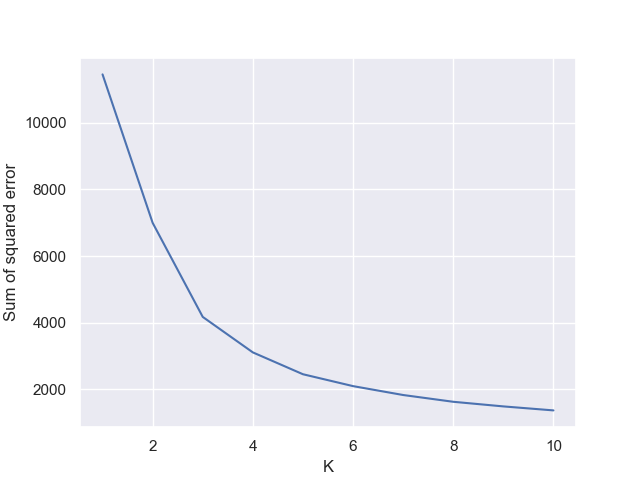

In [55]:
# Plot elbow plot to find k
fig, ax = plt.subplots()
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

In [56]:
# Perform K-Means clustering on normalized data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rfm_scaled[['Monetary', 'Frequency', 'Recency']])
y_predicted

array([2, 2, 0, ..., 1, 0, 0])

In [57]:
# Display cluster centers
km.cluster_centers_

array([[-0.18159141, -0.18994013, -0.47922416],
       [-0.45152509, -0.54205644,  1.52708108],
       [ 1.8409755 ,  2.06812236, -0.69439667]])

In [58]:
# Add clusters to dataset
rfm_scaled['Cluster']=y_predicted
rfm_scaled.head()

,Monetary,Frequency,Recency,Cluster
0,1.569442,0.404084,-0.924176,2
1,1.513385,1.573224,-0.904139,2
2,-0.165461,-0.131771,-0.914158,0
3,-0.618491,-0.777234,1.199669,1
4,-0.161974,-0.290092,-0.232924,0


In [60]:
rfm1=rfm_scaled[rfm_scaled['Cluster']==0]
rfm2=rfm_scaled[rfm_scaled['Cluster']==1]
rfm3=rfm_scaled[rfm_scaled['Cluster']==2]

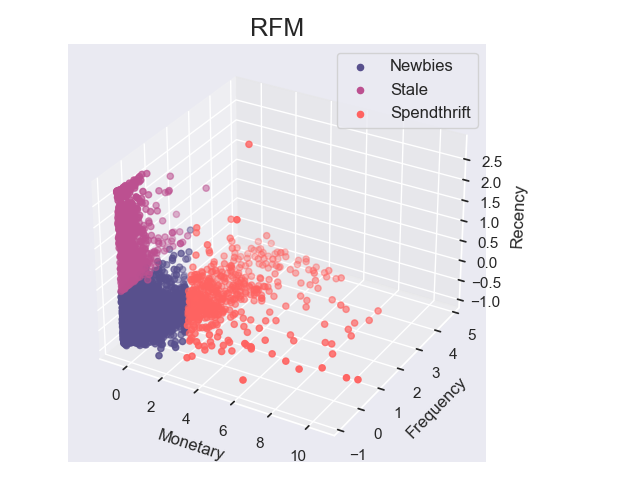

In [61]:
%matplotlib widget
sns.set(style = "darkgrid")
kplot = plt.axes(projection = '3d')
kplot.scatter3D(rfm1.Monetary, rfm1.Frequency, rfm1.Recency, c='#58508d', label = 'Newbies')
kplot.scatter3D(rfm2.Monetary, rfm2.Frequency, rfm2.Recency, c='#bc5090', label = 'Stale')
kplot.scatter3D(rfm3.Monetary, rfm3.Frequency, rfm3.Recency, c='#ff6361', label = 'Spendthrift')
kplot.set_xlabel("Monetary",fontsize=12)
kplot.set_ylabel("Frequency",fontsize=12)
kplot.set_zlabel("Recency",fontsize=12)
plt.title("RFM",fontsize=18)
plt.legend(bbox_to_anchor=(1.0,1.0),prop={'size': 12})
plt.tight_layout()
plt.show()

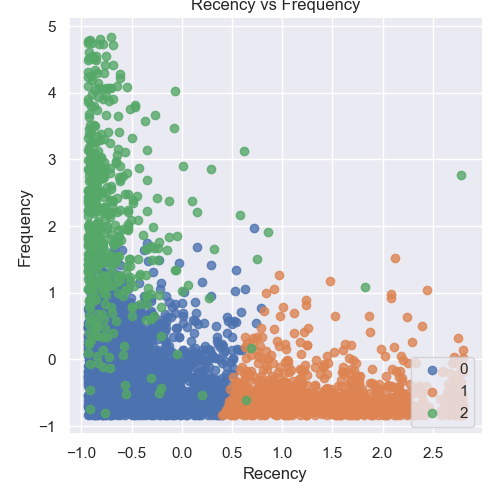

In [59]:
sns.lmplot(x="Monetary", y="Frequency", data=rfm_scaled, fit_reg=False, hue='Cluster', legend=False).set(title='Monetary vs Frequency')
sns.lmplot(x="Recency", y="Monetary", data=rfm_scaled, fit_reg=False, hue='Cluster', legend=False).set(title='Recency vs Monetary')
sns.lmplot(x="Recency", y="Frequency", data=rfm_scaled, fit_reg=False, hue='Cluster', legend=False).set(title='Recency vs Frequency')
plt.legend(loc='lower right')
plt.show()
